# Introduction
[World Bank Project Data](https://www.worldbank.org/en/home) - This data set contains information about World Bank project lending .

**The Dataset Consist of  27 Columns which are:**

0) id => Id


1) regionname => Tells about the region where the country is from


2) countryname => Country name


3) projectstatusdisplay => Our Target Variable Composes of 4 values ['Active' ,'Dropped' ,'Pipeline' ,'Closed']


4) last_stage_reached_name => It is categorical variable and  has 4 values ['Bank Approved' ,'Concept Review', 'Begin Negotiation', 'Decision Meeting', 'Begin Appraisal']


5) project_name => The project name for which the lending is reuqired


6) pdo => Program Devlopment Objective it says about the objective of the project


7) impagency => Implementated Agency(ministry)


8) cons_serv_reqd_ind => Consultant Service Required categoricla variable of 3 values ['TBD' ,'Y' ,'N'].


9) url => project URL


10) boardapprovaldate => Board Approval Date


11) closingdate => Project End Date


12) projectfinancialtype => Project Financial Type categorical variable of 4 values ['IDA' ,'Grants' ,'IBRD' ,'Other'] 


13) curr_project_cost => Cost of Project


14) curr_ibrd_commitment => IBRD Finance Commitment


15) curr_ida_commitment => IDA Finance Commitment


16) curr_total_commitment => IBRD+IDA


17) grantamt => Grant Amount by World Bank


18) borrower => Amount Taken By which Ministry or Organization


19) lendinginstr => Lending Instrument


20) envassesmentcategorycode => Environment Assesment Category Code has  8 values ['B' 'C' 'A' 'G' 'H' 'F' 'U' 'D'] 


21) esrc_ovrl_risk_rate => Environment Overall Risk Rate


22) sector1 => The sectors which would benifit from the project


23) sector2 => The sectors which would benifit from the project


24) sector3 => The sectors which would benifit from the project


25) theme1 => theme behind the project


26) theme2 => theme behind the project



# 1. Importing Libraries 

In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read in the World_Bank_Projects_downloaded_6_15_2022.xls file using the read_csv method and dtype = str option
df=pd.read_excel("World_Bank_Projects_downloaded_6_15_2022.xls",dtype='str',skiprows=2)

In [3]:
# Run the cell below to see what the data looks like
df.head()

,id,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,closingdate,projectfinancialtype,curr_project_cost,curr_ibrd_commitment,curr_ida_commitment,curr_total_commitment,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
0,P252350,Eastern and Southern Africa,Republic of Rwanda,Active,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,Ministry Of Education,NaN,http://projects.worldbank.org/P252350/null?lan...,2017-07-05T00:00:00Z,9/30/2023 12:00:00 AM,IDA,120000000,0,120000000,120000000,0,Ministry of Finance and Economic Planning,Program-for-Results Financing,NaN,NaN,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
1,P252338,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,"Ministry of Public Works, Transport, and Commu...",NaN,http://projects.worldbank.org/P252338/null?lan...,2017-04-27T00:00:00Z,NaN,NaN,39140000,0,35200000,35200000,0,Ministry of Finance,Investment Project Financing,B,NaN,Rural and Inter-Urban Roads,Public Administration - Transportation,NaN,NaN,NaN
2,P252337,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,NaN,http://projects.worldbank.org/P252337/null?lan...,NaN,NaN,NaN,340000,0,0,0,340000,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
3,P179254,Western and Central Africa,Republic of Cameroon,Pipeline,NaN,Cameroon Health System Strengthening Project,To increase utilization and quality of reprodu...,NaN,NaN,http://projects.worldbank.org/P179254/null?lan...,NaN,NaN,NaN,100000000,0,100000000,100000000,0,NaN,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P179238,Western and Central Africa,Republic of Chad,Pipeline,NaN,Chad Agribusiness and Rural Transformation Pro...,"The project Development Objective (PDO) is ""to...",NaN,NaN,http://projects.worldbank.org/P179238/null?lan...,NaN,NaN,NaN,150000000,0,150000000,150000000,0,NaN,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Inspecting a sample record
df.iloc[1]

id                                                                    P252338
regionname                                              East Asia and Pacific
countryname                                Democratic Republic of Timor-Leste
projectstatusdisplay                                                   Active
last_stage_reached_name                                         Bank Approved
project_name                Road Climate Resilience Project Second Additio...
pdo                         The project will deliver sustainable climate r...
impagency                   Ministry of Public Works, Transport, and Commu...
cons_serv_reqd_ind                                                        NaN
url                         http://projects.worldbank.org/P252338/null?lan...
boardapprovaldate                                        2017-04-27T00:00:00Z
closingdate                                                               NaN
projectfinancialtype                                            

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21543 entries, 0 to 21542
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        21543 non-null  object
 1   regionname                21540 non-null  object
 2   countryname               21540 non-null  object
 3   projectstatusdisplay      21538 non-null  object
 4   last_stage_reached_name   15197 non-null  object
 5   project_name              21541 non-null  object
 6   pdo                       11579 non-null  object
 7   impagency                 6650 non-null   object
 8   cons_serv_reqd_ind        1483 non-null   object
 9   url                       21541 non-null  object
 10  boardapprovaldate         18785 non-null  object
 11  closingdate               16585 non-null  object
 12  projectfinancialtype      13037 non-null  object
 13  curr_project_cost         21394 non-null  object
 14  curr_ibrd_commitment  

In [6]:
df.describe()

,id,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,closingdate,projectfinancialtype,curr_project_cost,curr_ibrd_commitment,curr_ida_commitment,curr_total_commitment,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
count,21543,21540,21540,21538,15197,21541,11579,6650,1483,21541,18785,16585,13037,21394,21541,21541,21541,21541,6413,21293,13082,1275,19627,11176,7565,12255,9895
unique,21543,11,207,4,5,18605,9861,4625,3,21541,5984,1831,4,4583,1301,1237,1912,969,2187,18,8,4,159,102,90,73,73
top,P252350,Latin America and Caribbean,Republic of India,Closed,Bank Approved,Education Project (02),Project Development Objective (Note: will be d...,Ministry of Finance,Y,http://projects.worldbank.org/P252350/null?lan...,2020-04-02T00:00:00Z,12/31/2022 12:00:00 AM,Other,100000000,0,0,0,0,Ministry of Finance,Specific Investment Loan,B,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure
freq,1,3766,918,15783,13495,70,47,227,912,1,28,160,4835,531,13331,12013,4264,17626,653,8021,5862,542,1815,1632,760,914,713


# Performing Exploitory Data Analysis ( EDA )

In [7]:
# count the number of null values in the data set
df.isnull().sum()

id                              0
regionname                      3
countryname                     3
projectstatusdisplay            5
last_stage_reached_name      6346
project_name                    2
pdo                          9964
impagency                   14893
cons_serv_reqd_ind          20060
url                             2
boardapprovaldate            2758
closingdate                  4958
projectfinancialtype         8506
curr_project_cost             149
curr_ibrd_commitment            2
curr_ida_commitment             2
curr_total_commitment           2
grantamt                        2
borrower                    15130
lendinginstr                  250
envassesmentcategorycode     8461
esrc_ovrl_risk_rate         20268
sector1                      1916
sector2                     10367
sector3                     13978
theme1                       9288
theme2                      11648
dtype: int64

In [8]:
#  output the shape of the data frame
df.shape

(21543, 27)

In [9]:
df.describe().T

,count,unique,top,freq
id,21543,21543,P252350,1
regionname,21540,11,Latin America and Caribbean,3766
countryname,21540,207,Republic of India,918
projectstatusdisplay,21538,4,Closed,15783
last_stage_reached_name,15197,5,Bank Approved,13495
project_name,21541,18605,Education Project (02),70
pdo,11579,9861,Project Development Objective (Note: will be d...,47
impagency,6650,4625,Ministry of Finance,227
cons_serv_reqd_ind,1483,3,Y,912
url,21541,21541,http://projects.worldbank.org/P252350/null?lan...,1


In [10]:
def convert_dtype(df,feature):
    df[feature]=pd.to_numeric(df[feature],errors='coerce')    #whereever we have Nan values , this errors parameter will hanfle that 

In [11]:
features=['grantamt','curr_project_cost']
for i in features:
    convert_dtype(df,i)

## Performing Data cleaning

In [12]:
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=='O']
    num_col=[col for col in df.columns if df[col].dtype!='O']
    return cat_col,num_col

In [13]:
cat_col,num_col=extract_cat_num(df)

In [14]:
cat_col

['id',
 'regionname',
 'countryname',
 'projectstatusdisplay',
 'last_stage_reached_name',
 'project_name',
 'pdo',
 'impagency',
 'cons_serv_reqd_ind',
 'url',
 'boardapprovaldate',
 'closingdate',
 'projectfinancialtype',
 'curr_ibrd_commitment',
 'curr_ida_commitment',
 'curr_total_commitment',
 'borrower',
 'lendinginstr',
 'envassesmentcategorycode',
 'esrc_ovrl_risk_rate',
 'sector1',
 'sector2',
 'sector3',
 'theme1',
 'theme2']

In [15]:
num_col=['grantamt','curr_project_cost']

In [16]:
df.head()

,id,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,closingdate,projectfinancialtype,curr_project_cost,curr_ibrd_commitment,curr_ida_commitment,curr_total_commitment,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
0,P252350,Eastern and Southern Africa,Republic of Rwanda,Active,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,Ministry Of Education,NaN,http://projects.worldbank.org/P252350/null?lan...,2017-07-05T00:00:00Z,9/30/2023 12:00:00 AM,IDA,120000000.0,0,120000000,120000000,0.0,Ministry of Finance and Economic Planning,Program-for-Results Financing,NaN,NaN,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
1,P252338,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,"Ministry of Public Works, Transport, and Commu...",NaN,http://projects.worldbank.org/P252338/null?lan...,2017-04-27T00:00:00Z,NaN,NaN,39140000.0,0,35200000,35200000,0.0,Ministry of Finance,Investment Project Financing,B,NaN,Rural and Inter-Urban Roads,Public Administration - Transportation,NaN,NaN,NaN
2,P252337,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,NaN,http://projects.worldbank.org/P252337/null?lan...,NaN,NaN,NaN,340000.0,0,0,0,340000.0,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
3,P179254,Western and Central Africa,Republic of Cameroon,Pipeline,NaN,Cameroon Health System Strengthening Project,To increase utilization and quality of reprodu...,NaN,NaN,http://projects.worldbank.org/P179254/null?lan...,NaN,NaN,NaN,100000000.0,0,100000000,100000000,0.0,NaN,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P179238,Western and Central Africa,Republic of Chad,Pipeline,NaN,Chad Agribusiness and Rural Transformation Pro...,"The project Development Objective (PDO) is ""to...",NaN,NaN,http://projects.worldbank.org/P179238/null?lan...,NaN,NaN,NaN,150000000.0,0,150000000,150000000,0.0,NaN,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# dirtiness in categorical data
for col in cat_col:
    print('{} has {} values'.format(col,df[col].nunique()))
    print("\n")

id has 21543 values


regionname has 11 values


countryname has 207 values


projectstatusdisplay has 4 values


last_stage_reached_name has 5 values


project_name has 18605 values


pdo has 9861 values


impagency has 4625 values


cons_serv_reqd_ind has 3 values


url has 21541 values


boardapprovaldate has 5984 values


closingdate has 1831 values


projectfinancialtype has 4 values


curr_ibrd_commitment has 1301 values


curr_ida_commitment has 1237 values


curr_total_commitment has 1912 values


borrower has 2187 values


lendinginstr has 18 values


envassesmentcategorycode has 8 values


esrc_ovrl_risk_rate has 4 values


sector1 has 159 values


sector2 has 102 values


sector3 has 90 values


theme1 has 73 values


theme2 has 73 values




In [18]:
# dirtiness in categorical data
cat_col_unq=[]
for col in cat_col:
    if df[col].nunique()<10:
        cat_col_unq.append(col)
        print('{} has {} values'.format(col,df[col].unique()))
        print("\n")

projectstatusdisplay has ['Active' 'Dropped' 'Pipeline' nan 'Closed'] values


last_stage_reached_name has ['Bank Approved' 'Concept Review' nan 'Begin Negotiation'
 'Decision Meeting' 'Begin Appraisal'] values


cons_serv_reqd_ind has [nan 'TBD' 'Y' 'N'] values


projectfinancialtype has ['IDA' nan 'Grants' 'IBRD' 'Other'] values


envassesmentcategorycode has [nan 'B' 'C' 'A' 'G' 'H' 'F' 'U' 'D'] values


esrc_ovrl_risk_rate has [nan 'Moderate' 'Substantial' 'High' 'Low'] values




In [19]:
for col in cat_col:
    if df[col].nunique()<10:
        cat_col_unq.append(col)
        print('{} has {} values'.format(col,df[col].unique()))
        print("\n")

projectstatusdisplay has ['Active' 'Dropped' 'Pipeline' nan 'Closed'] values


last_stage_reached_name has ['Bank Approved' 'Concept Review' nan 'Begin Negotiation'
 'Decision Meeting' 'Begin Appraisal'] values


cons_serv_reqd_ind has [nan 'TBD' 'Y' 'N'] values


projectfinancialtype has ['IDA' nan 'Grants' 'IBRD' 'Other'] values


envassesmentcategorycode has [nan 'B' 'C' 'A' 'G' 'H' 'F' 'U' 'D'] values


esrc_ovrl_risk_rate has [nan 'Moderate' 'Substantial' 'High' 'Low'] values




## Analysing distribution of each and every column

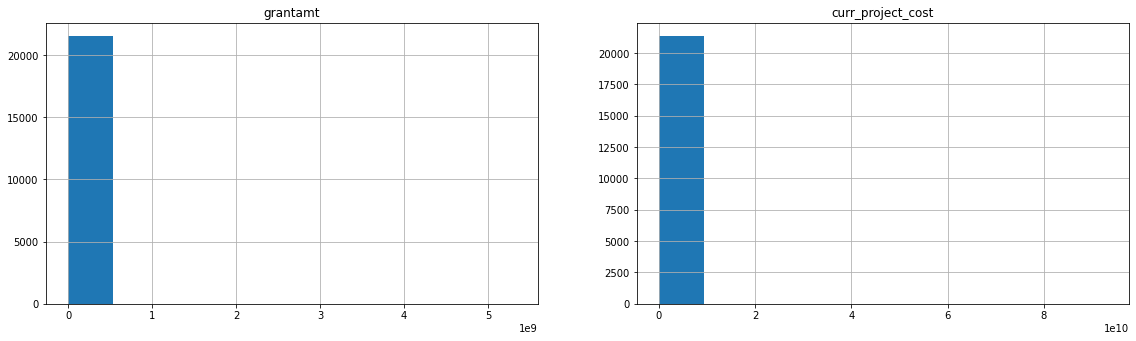

In [20]:
plt.figure(figsize=(30,30))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)   # 5 rows and 3 columns        
    df[feature].hist()
    plt.title(feature)

## Check Label distribution of categorical Data

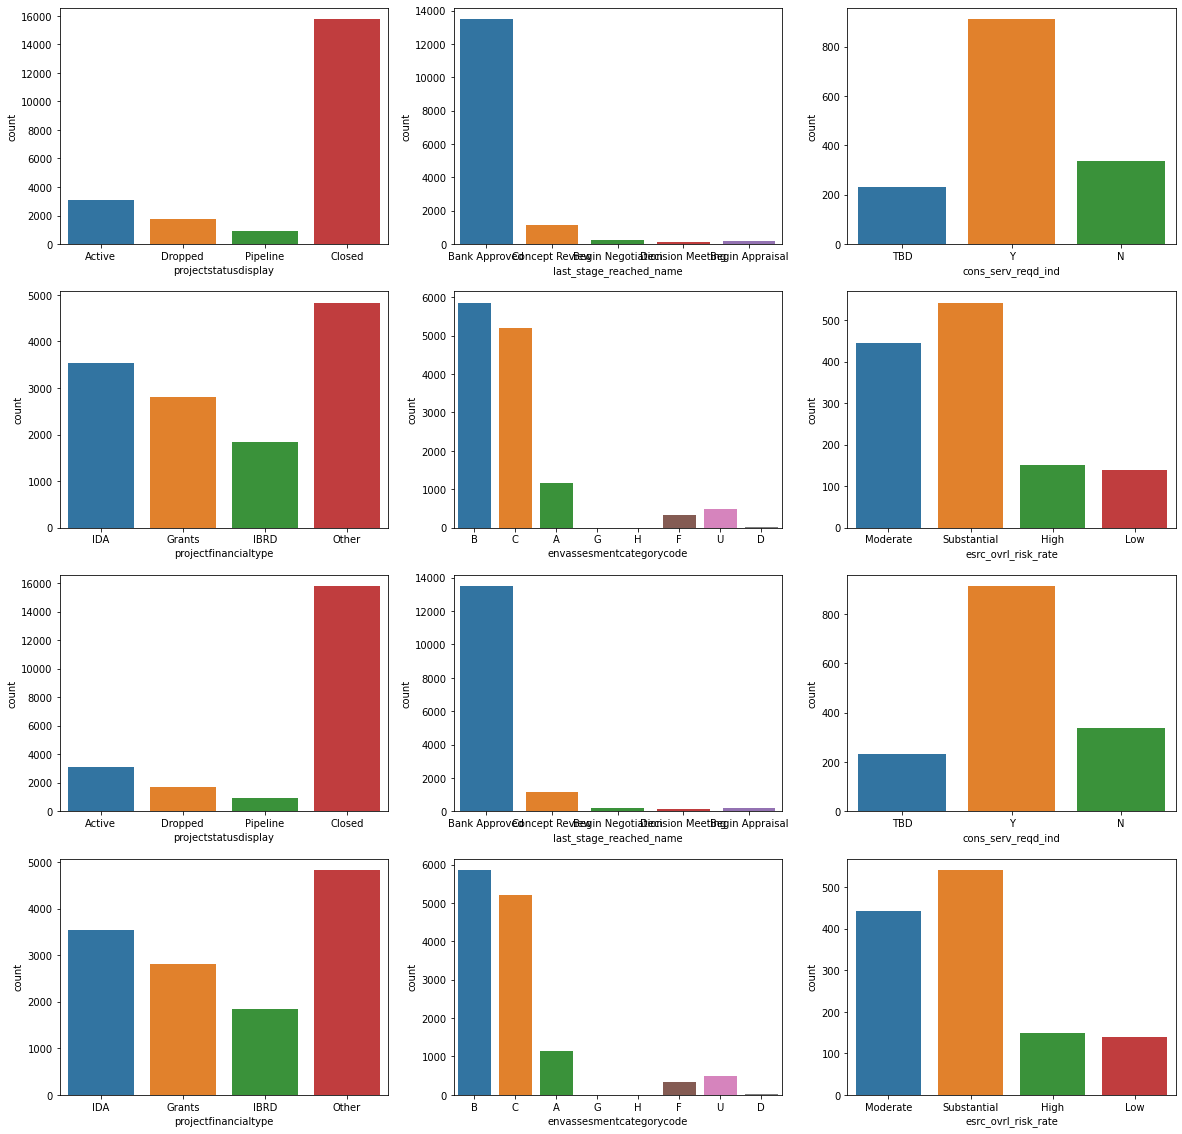

In [21]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(cat_col_unq):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])

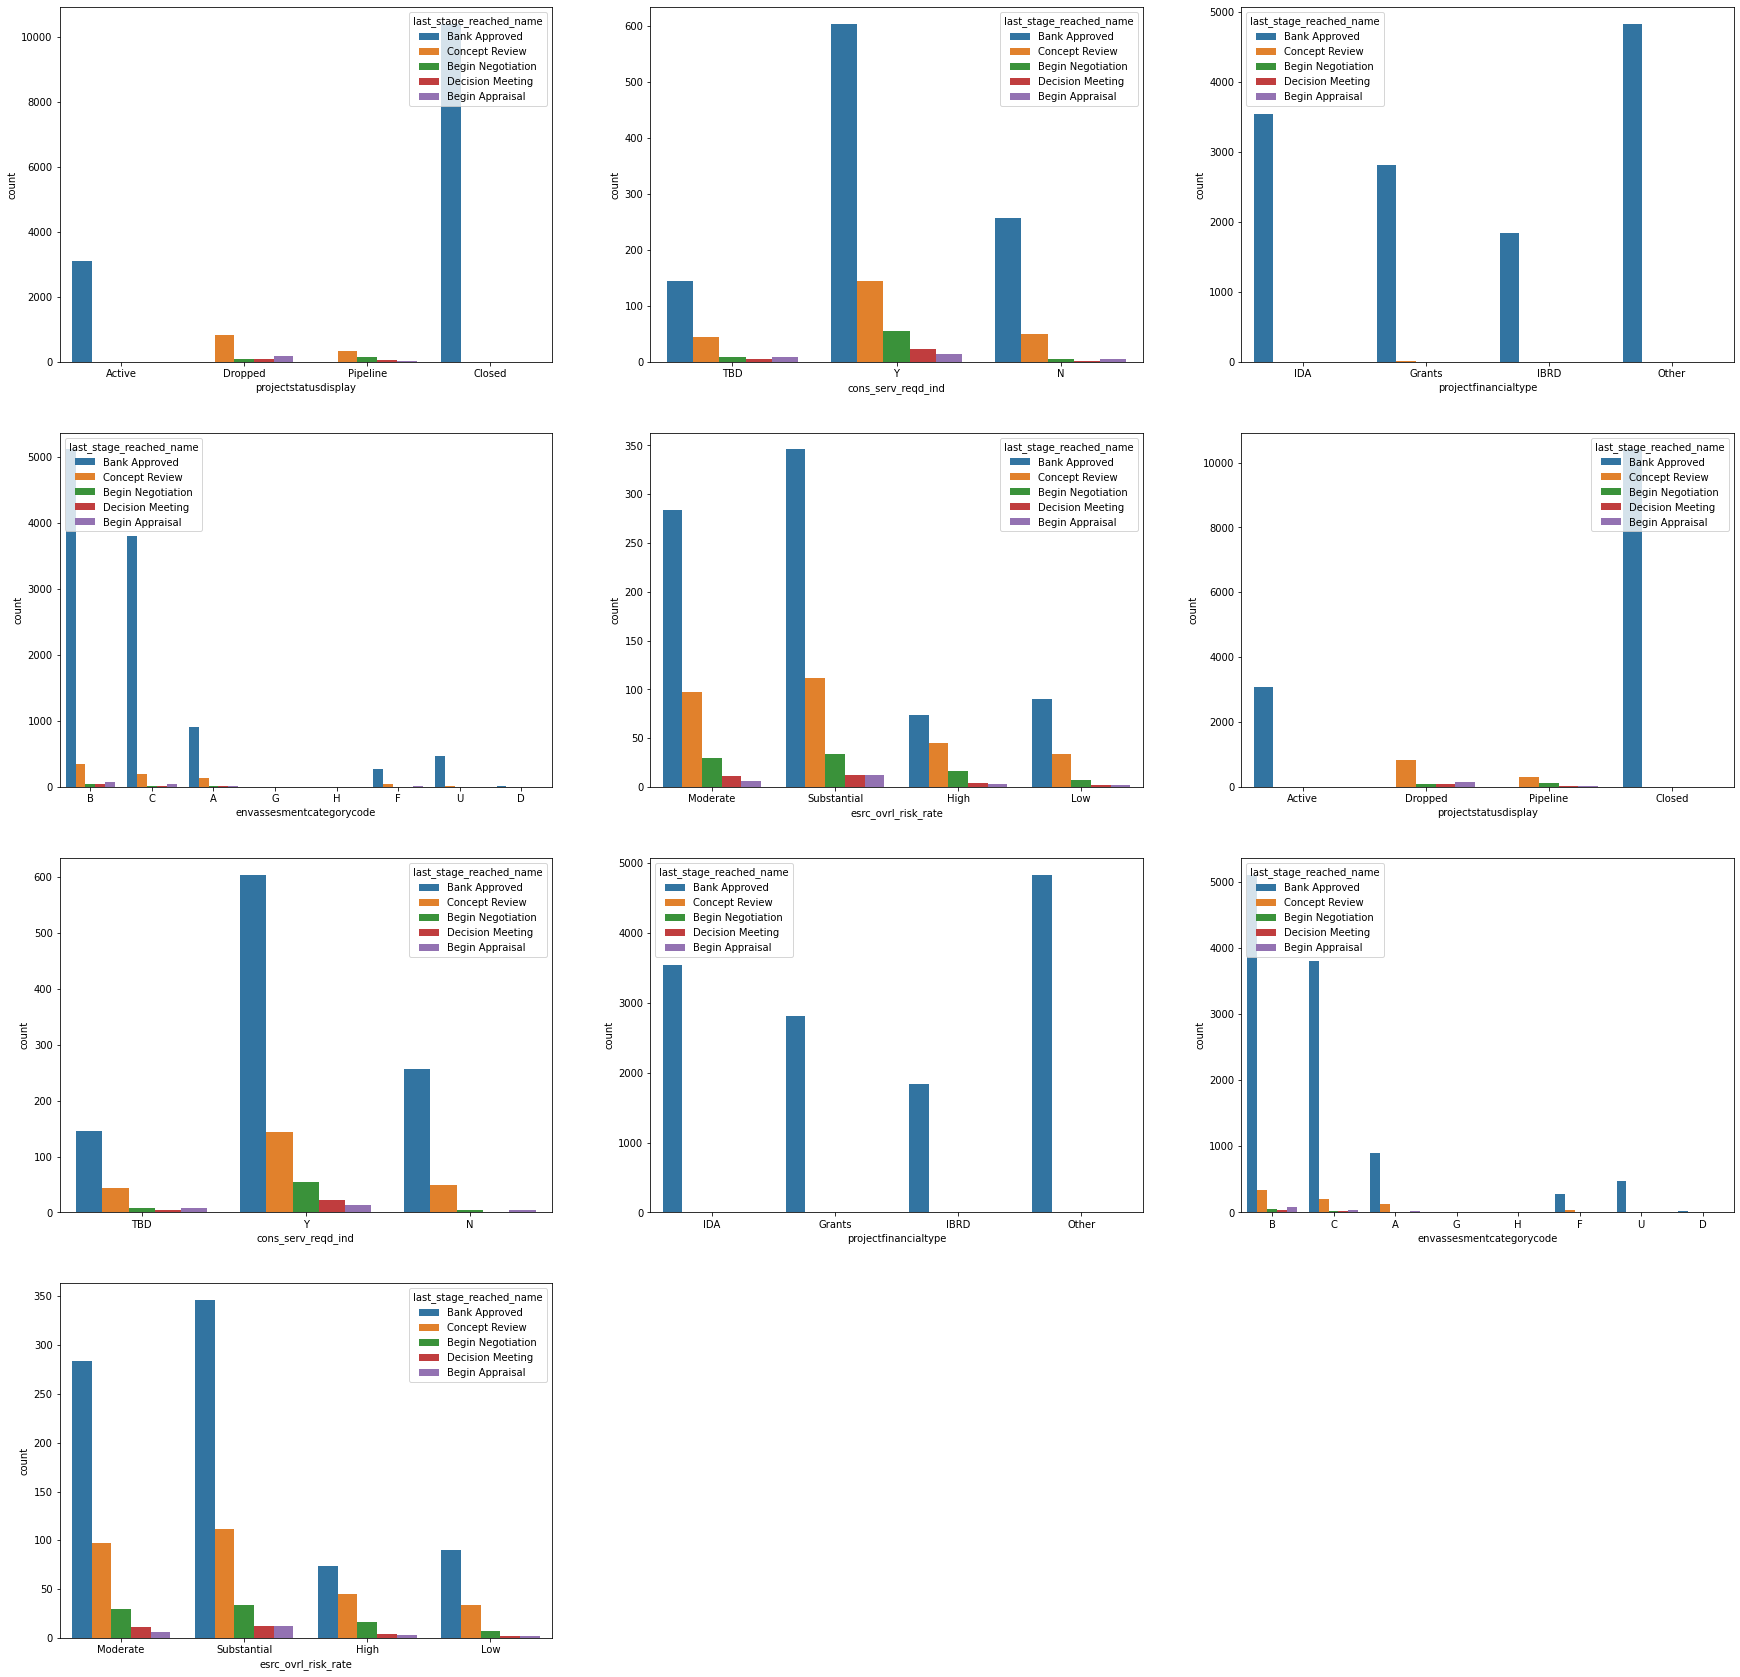

In [22]:
plt.figure(figsize=(30,30))
j=0
for i,feature in enumerate(cat_col_unq):
   
    if feature!="last_stage_reached_name":
        j+=1
        plt.subplot(4,3,j)
        sns.countplot(df[feature],hue=df['last_stage_reached_name'])

<AxesSubplot:xlabel='last_stage_reached_name', ylabel='count'>

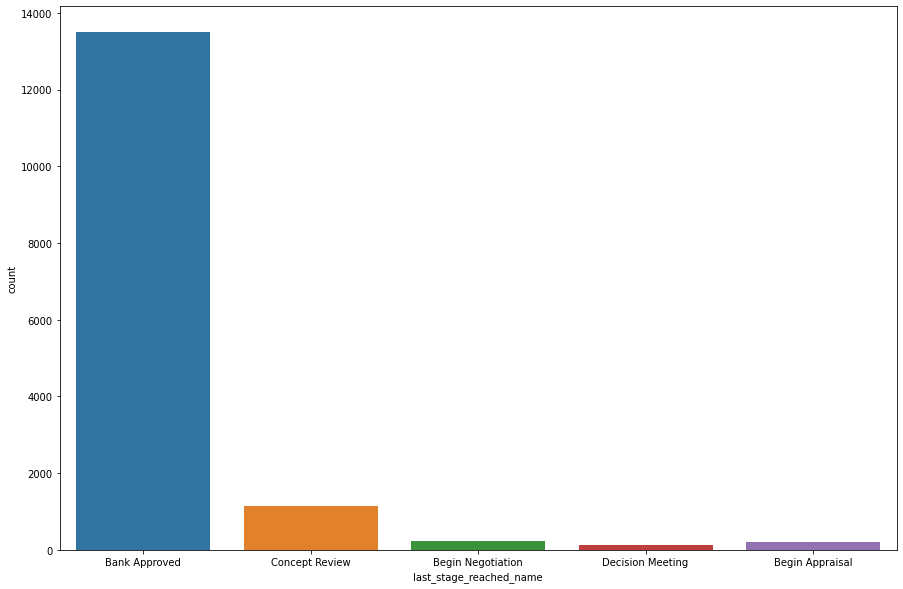

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(df['last_stage_reached_name'])

## Correlation between features

In [24]:
cat_col_unq

['projectstatusdisplay',
 'last_stage_reached_name',
 'cons_serv_reqd_ind',
 'projectfinancialtype',
 'envassesmentcategorycode',
 'esrc_ovrl_risk_rate',
 'projectstatusdisplay',
 'last_stage_reached_name',
 'cons_serv_reqd_ind',
 'projectfinancialtype',
 'envassesmentcategorycode',
 'esrc_ovrl_risk_rate']

In [25]:
df['cons_serv_reqd_ind'].isnull().sum()

20060

In [26]:
df.shape

(21543, 27)

In [27]:
df.groupby(['cons_serv_reqd_ind','last_stage_reached_name'])["grantamt"].agg(['count','mean','median','min','max'])

count          mean  median  min  \
cons_serv_reqd_ind last_stage_reached_name                                     
N                  Bank Approved              257  1.862101e+06     0.0  0.0   
                   Begin Appraisal              5  0.000000e+00     0.0  0.0   
                   Begin Negotiation            5  4.000000e+06     0.0  0.0   
                   Concept Review              49  1.709388e+06     0.0  0.0   
                   Decision Meeting             1  0.000000e+00     0.0  0.0   
TBD                Bank Approved              145  2.927034e+06     0.0  0.0   
                   Begin Appraisal              8  5.801250e+06     0.0  0.0   
                   Begin Negotiation            8  1.605000e+06     0.0  0.0   
                   Concept Review              44  2.316136e+06     0.0  0.0   
                   Decision Meeting             4  0.000000e+00     0.0  0.0   
Y                  Bank Approved              604  3.846887e+06     0.0  0.0   
                   Begin Appraisal             13  4.784615e+05     0.0  0.0   
                   Begin Negotiation           54  4.579630e+05     0.0  0.0   
                   Concept Review             144  1.745972e+06     0.0  0.0   
                   Decision Meeting            23  2.356522e+06     0.0  0.0   

                                                    max  
cons_serv_reqd_ind last_stage_reached_name               
N                  Bank Approved             71000000.0  
                   Begin Appraisal                  0.0  
                   Begin Negotiation         20000000.0  
                   Concept Review            30000000.0  
                   Decision Meeting                 0.0  
TBD                Bank Approved             60330000.0  
                   Begin Appraisal           32050000.0  
                   Begin Negotiation         12840000.0  
                   Concept Review            45700000.0  
                   Decision Meeting                 0.0  
Y                  Bank Approved            333000000.0  
                   Begin Appraisal            3520000.0  
                   Begin Negotiation         15870000.0  
                   Concept Review            70000000.0  
                   Decision Meeting          20770000.0

In [28]:
df.groupby(['envassesmentcategorycode','last_stage_reached_name'])["grantamt"].agg(['count','mean','median','min','max'])

count          mean  median  \
envassesmentcategorycode last_stage_reached_name                                
A                        Bank Approved              903  1.640476e+06     0.0   
                         Begin Appraisal             22  2.336364e+06     0.0   
                         Begin Negotiation            9  7.777778e+06     0.0   
                         Concept Review             132  8.674242e+05     0.0   
                         Decision Meeting            10  0.000000e+00     0.0   
B                        Bank Approved             5110  3.327556e+06     0.0   
                         Begin Appraisal             80  4.715500e+06     0.0   
                         Begin Negotiation           45  9.951111e+05     0.0   
                         Concept Review             345  3.877710e+06     0.0   
                         Decision Meeting            41  2.736098e+06     0.0   
C                        Bank Approved             3800  1.793584e+06     0.0   
                         Begin Appraisal             44  3.136364e+05     0.0   
                         Begin Negotiation           18  0.000000e+00     0.0   
                         Concept Review             198  8.030808e+05     0.0   
                         Decision Meeting            19  5.684211e+04     0.0   
D                        Bank Approved               17  2.470588e+05     0.0   
                         Concept Review               1  0.000000e+00     0.0   
F                        Bank Approved              279  1.731254e+06     0.0   
                         Begin Appraisal              9  0.000000e+00     0.0   
                         Begin Negotiation            1  0.000000e+00     0.0   
                         Concept Review              39  8.461538e+05     0.0   
                         Decision Meeting             3  0.000000e+00     0.0   
H                        Bank Approved                2  0.000000e+00     0.0   
U                        Bank Approved              472  4.121610e+05     0.0   
                         Begin Appraisal              4  0.000000e+00     0.0   
                         Begin Negotiation            3  0.000000e+00     0.0   
                         Concept Review              12  2.666667e+05     0.0   
                         Decision Meeting             2  0.000000e+00     0.0   

                                                  min           max  
envassesmentcategorycode last_stage_reached_name                     
A                        Bank Approved            0.0  2.500000e+08  
                         Begin Appraisal          0.0  4.900000e+07  
                         Begin Negotiation        0.0  7.000000e+07  
                         Concept Review           0.0  7.000000e+07  
                         Decision Meeting         0.0  0.000000e+00  
B                        Bank Approved            0.0  1.329000e+09  
                         Begin Appraisal          0.0  1.130000e+08  
                         Begin Negotiation        0.0  1.000000e+07  
                         Concept Review           0.0  4.900000e+08  
                         Decision Meeting         0.0  3.600000e+07  
C                        Bank Approved            0.0  5.509900e+08  
                         Begin Appraisal          0.0  7.600000e+06  
                         Begin Negotiation        0.0  0.000000e+00  
                         Concept Review           0.0  3.200000e+07  
                         Decision Meeting         0.0  6.500000e+05  
D                        Bank Approved            0.0  4.000000e+06  
                         Concept Review           0.0  0.000000e+00  
F                        Bank Approved            0.0  4.894000e+07  
                         Begin Appraisal          0.0  0.000000e+00  
                         Begin Negotiation        0.0  0.000000e+00  
                         Concept Review           0.0  2.000000e+07  
         

In [29]:
df.groupby(['esrc_ovrl_risk_rate','last_stage_reached_name'])["grantamt"].agg(['count','mean','median','min','max'])

count          mean    median  \
esrc_ovrl_risk_rate last_stage_reached_name                                  
High                Bank Approved               74  7.995946e+05       0.0   
                    Begin Appraisal              3  1.583333e+07       0.0   
                    Begin Negotiation           16  0.000000e+00       0.0   
                    Concept Review              45  2.997778e+05       0.0   
                    Decision Meeting             4  0.000000e+00       0.0   
Low                 Bank Approved               90  1.582667e+06  455000.0   
                    Begin Appraisal              2  0.000000e+00       0.0   
                    Begin Negotiation            7  0.000000e+00       0.0   
                    Concept Review              34  1.510000e+06  535000.0   
                    Decision Meeting             2  0.000000e+00       0.0   
Moderate            Bank Approved              284  2.340035e+06       0.0   
                    Begin Appraisal              6  5.866667e+05       0.0   
                    Begin Negotiation           30  9.833333e+05       0.0   
                    Concept Review              97  1.523093e+06       0.0   
                    Decision Meeting            11  4.547273e+06       0.0   
Substantial         Bank Approved              346  4.470376e+06       0.0   
                    Begin Appraisal             12  1.041667e+06       0.0   
                    Begin Negotiation           34  1.105000e+06       0.0   
                    Concept Review             112  3.610357e+06       0.0   
                    Decision Meeting            12  3.184083e+07       0.0   

                                             min          max  
esrc_ovrl_risk_rate last_stage_reached_name                    
High                Bank Approved            0.0   30850000.0  
                    Begin Appraisal          0.0   47500000.0  
                    Begin Negotiation        0.0          0.0  
                    Concept Review           0.0   13490000.0  
                    Decision Meeting         0.0          0.0  
Low                 Bank Approved            0.0   23240000.0  
                    Begin Appraisal          0.0          0.0  
                    Begin Negotiation        0.0          0.0  
                    Concept Review           0.0   16000000.0  
                    Decision Meeting         0.0          0.0  
Moderate            Bank Approved            0.0   84890000.0  
                    Begin Appraisal          0.0    3520000.0  
                    Begin Negotiation        0.0   20000000.0  
                    Concept Review           0.0   45700000.0  
                    Decision Meeting         0.0   24580000.0  
Substantial         Bank Approved            0.0  333000000.0  
                    Begin Appraisal          0.0   12500000.0  
                    Begin Negotiation        0.0   15870000.0  
                    Concept Review           0.0   70000000.0  
                    Decision Meeting         0.0  272000000.0

In [30]:
df.groupby(['projectfinancialtype','last_stage_reached_name'])["grantamt"].agg(['count','mean','median','min','max'])

count          mean     median  \
projectfinancialtype last_stage_reached_name                                   
Grants               Bank Approved             2812  7.808709e+06  1355000.0   
                     Begin Appraisal              1  4.000000e+05   400000.0   
                     Concept Review               2  3.750000e+05   375000.0   
IBRD                 Bank Approved             1844  0.000000e+00        0.0   
IDA                  Bank Approved             3540  7.502825e+03        0.0   
Other                Bank Approved             4828  1.767401e+06        0.0   
                     Begin Appraisal              1  1.000000e+06  1000000.0   

                                                    min           max  
projectfinancialtype last_stage_reached_name                           
Grants               Bank Approved                  0.0  1.329000e+09  
                     Begin Appraisal           400000.0  4.000000e+05  
                     Concept Review            300000.0  4.500000e+05  
IBRD                 Bank Approved                  0.0  0.000000e+00  
IDA                  Bank Approved                  0.0  1.000000e+07  
Other                Bank Approved                  0.0  9.310000e+08  
                     Begin Appraisal          1000000.0  1.000000e+06

In [31]:
df.groupby(['projectstatusdisplay','last_stage_reached_name'])["grantamt"].agg(['count','mean','median','min','max'])

count          mean     median  \
projectstatusdisplay last_stage_reached_name                                   
Active               Bank Approved             3087  3.177311e+06        0.0   
Closed               Bank Approved            10404  2.111384e+06        0.0   
                     Begin Appraisal              2  7.000000e+05   700000.0   
                     Begin Negotiation            1  6.000000e+06  6000000.0   
                     Concept Review               3  2.833333e+05   300000.0   
                     Decision Meeting             1  4.300000e+05   430000.0   
Dropped              Bank Approved                3  4.500000e+05        0.0   
                     Begin Appraisal            166  1.903855e+06        0.0   
                     Begin Negotiation           90  1.952000e+06        0.0   
                     Concept Review             834  8.647182e+06        0.0   
                     Decision Meeting            87  1.360460e+06        0.0   
Pipeline             Begin Appraisal             33  2.590303e+06        0.0   
                     Begin Negotiation          132  1.538409e+06        0.0   
                     Concept Review             314  1.549013e+06        0.0   
                     Decision Meeting            37  1.230676e+07        0.0   

                                                    min           max  
projectstatusdisplay last_stage_reached_name                           
Active               Bank Approved                  0.0  3.330000e+08  
Closed               Bank Approved                  0.0  1.329000e+09  
                     Begin Appraisal           400000.0  1.000000e+06  
                     Begin Negotiation        6000000.0  6.000000e+06  
                     Concept Review            100000.0  4.500000e+05  
                     Decision Meeting          430000.0  4.300000e+05  
Dropped              Bank Approved                  0.0  1.350000e+06  
                     Begin Appraisal                0.0  6.000000e+07  
                     Begin Negotiation              0.0  1.200000e+08  
                     Concept Review                 0.0  5.330000e+09  
                     Decision Meeting               0.0  3.600000e+07  
Pipeline             Begin Appraisal                0.0  3.205000e+07  
                     Begin Negotiation              0.0  7.000000e+07  
                     Concept Review                 0.0  7.000000e+07  
                     Decision Meeting               0.0  2.720000e+08


## Filling missing values in categorical columns using random values

It was more important to find the missing values and need to clean thos emissing values by using different menthods. ( I've dropped the NULL Values ). Missing Values leads to False Output and sometimes cause many Problems while Evaluating our Model.

![image](https://datascience.foundation/backend/web/uploads/blog/missing-data09-28-2017_015846.jpg)

In [32]:
df.isnull().sum()

id                              0
regionname                      3
countryname                     3
projectstatusdisplay            5
last_stage_reached_name      6346
project_name                    2
pdo                          9964
impagency                   14893
cons_serv_reqd_ind          20060
url                             2
boardapprovaldate            2758
closingdate                  4958
projectfinancialtype         8506
curr_project_cost             149
curr_ibrd_commitment            2
curr_ida_commitment             2
curr_total_commitment           2
grantamt                        2
borrower                    15130
lendinginstr                  250
envassesmentcategorycode     8461
esrc_ovrl_risk_rate         20268
sector1                      1916
sector2                     10367
sector3                     13978
theme1                       9288
theme2                      11648
dtype: int64

In [33]:
df.isnull().sum().sort_values(ascending=False)

esrc_ovrl_risk_rate         20268
cons_serv_reqd_ind          20060
borrower                    15130
impagency                   14893
sector3                     13978
theme2                      11648
sector2                     10367
pdo                          9964
theme1                       9288
projectfinancialtype         8506
envassesmentcategorycode     8461
last_stage_reached_name      6346
closingdate                  4958
boardapprovaldate            2758
sector1                      1916
lendinginstr                  250
curr_project_cost             149
projectstatusdisplay            5
regionname                      3
countryname                     3
grantamt                        2
curr_total_commitment           2
curr_ida_commitment             2
curr_ibrd_commitment            2
url                             2
project_name                    2
id                              0
dtype: int64

In [34]:
list(enumerate(cat_col))

[(0, 'id'),
 (1, 'regionname'),
 (2, 'countryname'),
 (3, 'projectstatusdisplay'),
 (4, 'last_stage_reached_name'),
 (5, 'project_name'),
 (6, 'pdo'),
 (7, 'impagency'),
 (8, 'cons_serv_reqd_ind'),
 (9, 'url'),
 (10, 'boardapprovaldate'),
 (11, 'closingdate'),
 (12, 'projectfinancialtype'),
 (13, 'curr_ibrd_commitment'),
 (14, 'curr_ida_commitment'),
 (15, 'curr_total_commitment'),
 (16, 'borrower'),
 (17, 'lendinginstr'),
 (18, 'envassesmentcategorycode'),
 (19, 'esrc_ovrl_risk_rate'),
 (20, 'sector1'),
 (21, 'sector2'),
 (22, 'sector3'),
 (23, 'theme1'),
 (24, 'theme2')]

In [35]:
df["grantamt"].isnull().sum()

2

In [36]:
df["grantamt"].value_counts()

0.000000e+00    17626
5.000000e+06      121
3.000000e+06      104
1.000000e+07       99
1.000000e+06       97
2.000000e+05       75
2.000000e+06       72
5.000000e+05       68
3.000000e+05       59
6.000000e+06       57
7.000000e+06       48
2.500000e+05       45
4.000000e+06       44
3.500000e+05       42
7.500000e+05       42
2.000000e+07       42
1.500000e+07       41
4.500000e+06       40
4.000000e+05       40
1.500000e+06       40
8.000000e+06       35
1.000000e+05       31
9.000000e+05       28
2.500000e+06       26
3.000000e+07       26
7.000000e+05       24
5.500000e+06       24
8.000000e+05       23
2.500000e+07       23
5.000000e+04       22
2.750000e+06       22
9.000000e+06       22
3.500000e+06       21
2.730000e+06       21
4.500000e+05       20
6.000000e+05       18
7.300000e+05       17
1.200000e+07       17
1.500000e+05       17
1.800000e+06       17
4.000000e+07       17
5.000000e+07       16
1.900000e+05       15
9.400000e+05       15
3.000000e+04       15
2.800000e+

As we can see maximum values are null so grantamt is not a good variable for our classifier

In [37]:
df["grantamt"].unique()[:100]

array([0.000e+00, 3.400e+05, 3.000e+06, 1.000e+07, 3.000e+07, 1.950e+07,
       2.700e+06, 5.800e+05, 1.000e+08, 1.349e+07, 2.000e+07, 5.000e+07,
       1.175e+07, 4.200e+06, 3.560e+06, 5.700e+05, 5.000e+06, 3.330e+08,
       2.650e+08, 2.720e+08, 3.500e+06, 1.500e+07, 2.077e+07, 2.350e+06,
       4.600e+05, 8.800e+05, 9.300e+06, 1.780e+06, 9.600e+06, 1.950e+08,
       4.000e+05, 1.000e+06, 2.000e+06, 4.000e+06, 8.000e+06, 7.500e+05,
       9.300e+05, 2.480e+06, 3.900e+06, 7.000e+06, 1.990e+06, 5.800e+07,
       2.000e+05, 1.425e+07, 9.500e+06, 1.023e+07,       nan, 2.500e+05,
       6.500e+05, 7.400e+05, 9.000e+05, 8.500e+05, 9.700e+06, 7.000e+05,
       1.300e+05, 5.000e+05, 2.720e+06, 4.100e+06, 1.460e+06, 2.750e+06,
       1.436e+07, 2.650e+06, 4.730e+06, 9.130e+06, 2.150e+07, 7.800e+06,
       4.570e+06, 4.360e+06, 1.275e+07, 3.100e+06, 4.500e+05, 4.100e+05,
       3.720e+06, 3.500e+05, 3.750e+06, 2.200e+06, 7.850e+06, 6.000e+05,
       1.220e+07, 9.420e+06, 2.400e+06, 6.580e+06, 

In [38]:
df["projectstatusdisplay"].value_counts()

Closed      15783
Active       3088
Dropped      1725
Pipeline      942
Name: projectstatusdisplay, dtype: int64

In [39]:
df = df[df.projectstatusdisplay != "Active"]
df = df[df.projectstatusdisplay != "Pipeline"]

In [40]:
df["projectstatusdisplay"].value_counts()

Closed     15783
Dropped     1725
Name: projectstatusdisplay, dtype: int64

In [41]:
df.shape

(17513, 27)

 As we want to build our classifier around Closed and Dropped so we can remove Active and Pipeline

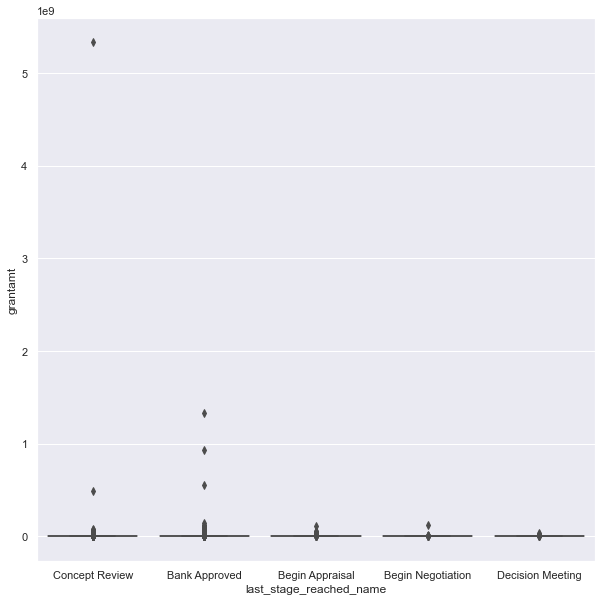

In [42]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,10))
ax=sns.boxplot(x=df['last_stage_reached_name'],y=df["grantamt"],data=df.reset_index())


In [43]:
df.head(20)

,id,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,closingdate,projectfinancialtype,curr_project_cost,curr_ibrd_commitment,curr_ida_commitment,curr_total_commitment,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
2,P252337,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,NaN,http://projects.worldbank.org/P252337/null?lan...,NaN,NaN,NaN,3.400000e+05,0,0,0,340000.0,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
194,P178571,South Asia,Republic of India,Dropped,Concept Review,Strengthening Teaching-Learning and Results fo...,The Project Development Objective (PDO) of the...,NaN,NaN,http://projects.worldbank.org/P178571/null?lan...,NaN,NaN,NaN,1.000000e+09,1000000000,0,1000000000,0.0,NaN,Program-for-Results Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,P178288,Europe and Central Asia,Romania,Dropped,Concept Review,Emergency Response and Preparedness Program-fo...,To strengthen the capacity of Romanian institu...,"Ministry of Health, Department for Emergency S...",NaN,http://projects.worldbank.org/P178288/null?lan...,NaN,NaN,NaN,1.448650e+09,288650000,0,288650000,0.0,Ministry of Finance,Program-for-Results Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,P177493,Europe and Central Asia,Ukraine,Dropped,Concept Review,Sustainable Energy Efficiency in Municipal Ser...,The development objective is to increase energ...,Ukrexim Bank,NaN,http://projects.worldbank.org/P177493/null?lan...,NaN,NaN,NaN,3.416400e+08,300000000,0,300000000,0.0,Ukrexim Bank,Investment Project Financing,NaN,Moderate,NaN,NaN,NaN,NaN,NaN
514,P177244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657,P176771,Latin America and Caribbean,United Mexican States,Dropped,Concept Review,Mexico: Sustainable Urban Development,To improve living conditions of vulnerable hou...,"Secretariat for Agrarian, Territorial and Urba...",NaN,http://projects.worldbank.org/P176771/null?lan...,NaN,NaN,NaN,1.500000e+08,150000000,0,150000000,0.0,United Mexican States,Investment Project Financing,NaN,Substantial,NaN,NaN,NaN,NaN,NaN
666,P176756,East Asia and Pacific,Kingdom of Cambodia,Closed,Bank Approved,"Cambodia Relief, Recovery and Resilience Devel...",The program development objective is to suppor...,Ministry of Economy and Finance,NaN,http://projects.worldbank.org/P176756/null?lan...,2021-06-24T00:00:00Z,5/31/2022 12:00:00 AM,IDA,2.000000e+08,0,200000000,200000000,0.0,Kingdom of Cambodia,Development Policy Lending,NaN,NaN,Central Government (Central Agencies),Banking Institutions,Social Protection,NaN,NaN
742,P176503,Europe and Central Asia,Republic of Azerbaijan,Dropped,Begin Appraisal,Azerbaijan COVID-19 Emergency Response Project,"The objective of the Project is to prevent, de...",Ministry of Labor and Social Protection of the...,NaN,http://projects.worldbank.org/P176503/null?lan...,NaN,NaN,NaN,9.500000e+07,95000000,0,95000000,0.0,Republic of Azerbaijan,Investment Project Financing,NaN,Substantial,NaN,NaN,NaN,NaN,NaN
745,P176492,Europe and Central Asia,Montenegro,Dropped,Begin Negotiation,Montenegro Emergency COVID-19 Response Project,The Project Development Objective is to preven...,Ministry of Health,NaN,http://projects.worldbank.org/P176492/null?lan...,NaN,NaN,NaN,1.500000e+07,15000000,0,15000000,0.0,Montenegro,Investment Project Financing,NaN,Substantial,NaN,NaN,NaN,NaN,NaN
750,P176477,Eastern and Southern Africa,Republic of Rwanda,Dropped,Concept Review,Rwanda - Enhancing Country Procurement System,The objective is strengthening and modernizing...,Rwanda Public Procurement Authority (RPPA),NaN,http://projects.worldbank.org/P176477/null?lan

In [44]:
df.pdo[:10]

2      To improve citizen and government access to co...
194    The Project Development Objective (PDO) of the...
258    To strengthen the capacity of Romanian institu...
473    The development objective is to increase energ...
514                                                  NaN
657    To improve living conditions of vulnerable hou...
666    The program development objective is to suppor...
742    The objective of the Project is to prevent, de...
745    The Project Development Objective is to preven...
750    The objective is strengthening and modernizing...
Name: pdo, dtype: object

In [45]:
df["theme1"].head(10)

2      Public expenditure, financial management and p...
194                                                  NaN
258                                                  NaN
473                                                  NaN
514                                                  NaN
657                                                  NaN
666                                                  NaN
742                                                  NaN
745                                                  NaN
750                                                  NaN
Name: theme1, dtype: object

In [46]:
df["curr_project_cost"].unique()[:100]

array([3.40000e+05, 1.00000e+09, 1.44865e+09, 3.41640e+08,         nan,
       1.50000e+08, 2.00000e+08, 9.50000e+07, 1.50000e+07, 4.10000e+05,
       3.72000e+06, 6.20000e+08, 3.50000e+07, 1.55000e+10, 1.40000e+07,
       1.15000e+08, 2.00000e+05, 1.37500e+09, 3.25000e+06, 1.00000e+07,
       2.50000e+07, 5.00000e+08, 6.00000e+08, 1.00000e+06, 3.00000e+06,
       2.12000e+06, 7.50000e+08, 2.50000e+08, 9.40000e+05, 8.50000e+07,
       6.23000e+06, 7.50000e+07, 7.00000e+07, 3.79000e+06, 3.00000e+07,
       1.68870e+09, 2.70000e+06, 1.00000e+08, 1.10100e+07, 5.00000e+06,
       2.80000e+08, 7.00000e+08, 3.00000e+08, 1.02000e+10, 5.00000e+07,
       5.50000e+07, 8.00000e+07, 1.08000e+07, 3.46000e+06, 1.47000e+07,
       2.54300e+08, 7.49960e+08, 3.10000e+09, 3.50000e+08, 2.00000e+07,
       6.50000e+06, 8.50000e+05, 1.30000e+06, 3.60000e+08, 2.22500e+08,
       1.75000e+08, 2.75010e+08, 3.10630e+08, 4.00000e+06, 1.45000e+08,
       1.15800e+07, 4.00000e+08, 1.72000e+06, 3.62000e+06, 3.321

In [47]:
df["closingdate"].unique()[:30]

array([nan, '5/31/2022 12:00:00 AM', '3/31/2022 12:00:00 AM',
       '12/31/2021 12:00:00 AM', '3/31/2021 12:00:00 AM',
       '1/31/2021 12:00:00 AM', '6/30/2021 12:00:00 AM',
       '9/30/2021 12:00:00 AM', '2/28/2021 12:00:00 AM',
       '12/31/2020 12:00:00 AM', '7/31/2021 12:00:00 AM',
       '2/9/2021 12:00:00 AM', '1/31/2022 12:00:00 AM',
       '3/30/2022 12:00:00 AM', '7/30/2021 12:00:00 AM',
       '12/1/2021 12:00:00 AM', '10/1/2024 12:00:00 AM',
       '5/31/2021 12:00:00 AM', '5/31/2020 12:00:00 AM',
       '10/31/2021 12:00:00 AM', '6/30/2023 12:00:00 AM',
       '7/15/2021 12:00:00 AM', '6/30/2022 12:00:00 AM',
       '10/29/2020 12:00:00 AM', '7/7/2021 12:00:00 AM',
       '11/30/2021 12:00:00 AM', '4/30/2021 12:00:00 AM',
       '6/17/2021 12:00:00 AM', '1/14/2022 12:00:00 AM',
       '3/31/2020 12:00:00 AM'], dtype=object)

In [48]:
df["boardapprovaldate"].unique()[:20]

array([nan, '2021-06-24T00:00:00Z', '2021-04-22T00:00:00Z',
       '2021-03-25T00:00:00Z', '2021-05-14T00:00:00Z',
       '2021-03-18T00:00:00Z', '2020-08-25T00:00:00Z',
       '2020-12-17T00:00:00Z', '2020-10-28T00:00:00Z',
       '2020-08-11T00:00:00Z', '2020-10-21T00:00:00Z',
       '2020-07-29T00:00:00Z', '2020-08-27T00:00:00Z',
       '2020-09-10T00:00:00Z', '2020-09-01T00:00:00Z',
       '2021-01-14T00:00:00Z', '2021-05-20T00:00:00Z',
       '2020-12-15T00:00:00Z', '2020-06-30T00:00:00Z',
       '2020-12-10T00:00:00Z'], dtype=object)

In [49]:
df["lendinginstr"].value_counts()

Specific Investment Loan                   7965
Investment Project Financing               2062
Technical Assistance Loan                  1638
Sector Investment and Maintenance Loan     1298
Development Policy Lending                 1049
Financial Intermediary Loan                 821
Emergency Recovery Loan                     573
Structural Adjustment Loan                  564
Adaptable Program Loan                      515
Sector Adjustment Loan                      387
Learning and Innovation Loan                180
Program-for-Results Financing                63
Programmatic Structural Adjustment Loan      51
UNIDENTIFIED                                 46
Poverty Reduction Support Credit             40
Rehabilitation Loan                          22
Debt and Debt Service Reduction Loan         16
Special Structural Adjustment Loan            2
Name: lendinginstr, dtype: int64

In [50]:
df["curr_project_cost"].unique()[:20]

array([3.40000e+05, 1.00000e+09, 1.44865e+09, 3.41640e+08,         nan,
       1.50000e+08, 2.00000e+08, 9.50000e+07, 1.50000e+07, 4.10000e+05,
       3.72000e+06, 6.20000e+08, 3.50000e+07, 1.55000e+10, 1.40000e+07,
       1.15000e+08, 2.00000e+05, 1.37500e+09, 3.25000e+06, 1.00000e+07])

In [51]:
# Target Variable
df["projectstatusdisplay"].isnull().sum()

5

In [52]:
df["curr_total_commitment"].value_counts()

0             3424
100000000      534
50000000       480
20000000       442
30000000       430
10000000       400
15000000       376
25000000       370
5000000        359
40000000       337
150000000      294
200000000      265
60000000       232
300000000      193
35000000       181
80000000       169
70000000       166
12000000       144
8000000        130
75000000       128
250000000      126
45000000       118
6000000        117
500000000      109
7000000        105
90000000       101
120000000       98
4000000         97
3000000         95
18000000        93
55000000        90
9000000         87
22000000        83
125000000       82
14000000        80
65000000        80
400000000       79
16000000        77
24000000        74
2000000         74
11000000        73
17000000        70
21000000        67
110000000       61
28000000        60
13000000        60
32000000        60
23000000        58
350000000       58
85000000        56
7500000         55
26000000        54
130000000   

In [53]:
df["curr_ibrd_commitment"].value_counts()

0             10389
100000000       352
50000000        253
30000000        217
200000000       204
150000000       192
20000000        190
25000000        188
300000000       157
40000000        153
15000000        133
10000000        129
60000000        118
5000000         117
80000000        102
250000000        98
500000000        92
35000000         85
70000000         84
75000000         79
400000000        67
90000000         56
45000000         51
120000000        50
12000000         45
7000000          44
125000000        44
350000000        43
65000000         40
55000000         38
24000000         38
4000000          37
110000000        36
22000000         35
32000000         35
6000000          34
85000000         34
23000000         33
9000000          32
17000000         32
21000000         32
130000000        31
28000000         31
14000000         31
18000000         31
8000000          29
16000000         28
26000000         28
42000000         28
3000000          27


In [54]:
df["curr_ida_commitment"].value_counts()

0             10141
10000000        298
20000000        282
15000000        262
5000000         260
50000000        251
30000000        230
25000000        200
40000000        197
100000000       193
60000000        114
35000000        104
8000000         104
12000000        103
150000000       101
6000000          95
70000000         87
3000000          74
4000000          72
45000000         71
80000000         71
7000000          71
200000000        68
75000000         63
2000000          63
9000000          62
18000000         56
14000000         52
16000000         52
55000000         52
22000000         50
11000000         47
125000000        47
90000000         47
120000000        46
13000000         43
65000000         41
3500000          39
17000000         38
7500000          38
21000000         37
24000000         37
5500000          32
300000000        31
23000000         30
250000000        30
28000000         30
27000000         29
4500000          29
110000000        27


In [55]:
df["curr_project_cost"].value_counts()

1.000000e+08    381
5.000000e+07    357
1.000000e+07    356
3.000000e+07    348
2.000000e+07    333
5.000000e+06    295
2.500000e+07    294
1.500000e+07    287
4.000000e+07    265
1.500000e+08    199
2.000000e+08    195
6.000000e+07    174
0.000000e+00    167
3.000000e+06    148
3.000000e+08    145
6.000000e+06    145
7.000000e+07    134
3.500000e+07    134
8.000000e+07    123
1.200000e+07    121
8.000000e+06    121
7.000000e+06    113
7.500000e+07    110
2.500000e+08    107
4.000000e+06    106
2.000000e+06    102
5.000000e+08     97
4.500000e+07     95
1.800000e+07     95
1.100000e+07     86
1.600000e+07     86
1.400000e+07     81
9.000000e+06     80
2.200000e+07     79
9.000000e+07     76
1.000000e+06     76
1.200000e+08     73
5.500000e+07     72
2.400000e+07     69
1.500000e+06     67
1.250000e+08     67
4.000000e+08     66
6.500000e+07     66
1.700000e+07     64
2.100000e+07     62
1.300000e+07     62
3.000000e+05     61
5.500000e+06     61
2.300000e+07     61
2.800000e+07     61


In [56]:
df["url"].unique()[:20]

array(['http://projects.worldbank.org/P252337/null?lang=en',
       'http://projects.worldbank.org/P178571/null?lang=en',
       'http://projects.worldbank.org/P178288/null?lang=en',
       'http://projects.worldbank.org/P177493/null?lang=en', nan,
       'http://projects.worldbank.org/P176771/null?lang=en',
       'http://projects.worldbank.org/P176756/null?lang=en',
       'http://projects.worldbank.org/P176503/null?lang=en',
       'http://projects.worldbank.org/P176492/null?lang=en',
       'http://projects.worldbank.org/P176477/null?lang=en',
       'http://projects.worldbank.org/P176454/null?lang=en',
       'http://projects.worldbank.org/P176167/null?lang=en',
       'http://projects.worldbank.org/P175813/null?lang=en',
       'http://projects.worldbank.org/P175644/null?lang=en',
       'http://projects.worldbank.org/P175567/null?lang=en',
       'http://projects.worldbank.org/P175420/null?lang=en',
       'http://projects.worldbank.org/P175400/null?lang=en',
       'http://proj

In [57]:
df["project_name"].unique()[:100]

array(['Kenya Devolution and Service Delivery',
       'Strengthening Teaching-Learning and Results for States – Learning Enhancement and Acceleration during Pandemic (LEAP) program',
       'Emergency Response and Preparedness Program-for-Results',
       'Sustainable Energy Efficiency in Municipal Services (SEEMS)', nan,
       'Mexico: Sustainable Urban Development',
       'Cambodia Relief, Recovery and Resilience Development Policy Financing',
       'Azerbaijan COVID-19 Emergency Response Project',
       'Montenegro Emergency COVID-19 Response Project',
       'Rwanda - Enhancing Country Procurement System',
       'Armenia Support to Conflict Affected Families Project',
       'Ethiopia Food Systems Resilience Project',
       'Second Competitiveness Enhancement Project - Additional finance and restructuring',
       "PM-ASBY: India's Enhanced Health Service Delivery Program",
       'Additional Financing for the Inclusive Access and Quality Education Project',
       'Jordan C

In [58]:
df["countryname"].unique()[:20]

array(['Republic of Kenya', 'Republic of India', 'Romania', 'Ukraine',
       nan, 'United Mexican States', 'Kingdom of Cambodia',
       'Republic of Azerbaijan', 'Montenegro', 'Republic of Rwanda',
       'Republic of Armenia', 'Federal Democratic Republic of Ethiopia',
       'Republic of Moldova', 'Republic of the Union of Myanmar',
       'Hashemite Kingdom of Jordan', 'World', 'Republic of the Sudan',
       'Republic of Colombia', 'Commonwealth of Dominica',
       'Republic of Poland'], dtype=object)

In [59]:
df["projectfinancialtype"].value_counts()

Other     3935
IDA       2589
Grants    2104
IBRD      1546
Name: projectfinancialtype, dtype: int64

In [60]:
df["projectfinancialtype"].isnull().sum()

7339

In [61]:
df["theme2"].value_counts()

Rural services and infrastructure                              638
Infrastructure services for private sector development         384
Public expenditure, financial management and procurement       381
Administrative and civil service reform                        377
Environmental policies and institutions                        367
Regulation and competition policy                              292
Pollution management and environmental health                  284
Participation and civic engagement                             281
Climate change                                                 244
Other financial and private sector development                 220
Health system performance                                      212
Water resource management                                      212
Education for all                                              209
Urban services and housing for the poor                        208
Micro, Small and Medium Enterprise support                    

In [62]:
df["projectstatusdisplay"].value_counts()

Closed     15783
Dropped     1725
Name: projectstatusdisplay, dtype: int64

In [63]:
df["projectstatusdisplay"].isnull().sum()

5

In [64]:
df = df[df['projectstatusdisplay'].notna()]
df.shape

(17508, 27)

In [65]:
df["envassesmentcategorycode"].value_counts()

C    4944
B    4711
A     925
U     492
F     289
D      25
Name: envassesmentcategorycode, dtype: int64

In [66]:
df.isnull().sum().sort_values(ascending=False)

esrc_ovrl_risk_rate         17399
cons_serv_reqd_ind          17321
borrower                    14482
impagency                   14232
sector3                     11511
pdo                          9908
sector2                      8824
theme2                       8373
projectfinancialtype         7334
theme1                       6344
envassesmentcategorycode     6122
last_stage_reached_name      5917
closingdate                  3137
boardapprovaldate            1813
sector1                       871
lendinginstr                  219
curr_project_cost             116
grantamt                        0
curr_total_commitment           0
curr_ida_commitment             0
curr_ibrd_commitment            0
regionname                      0
url                             0
project_name                    0
projectstatusdisplay            0
countryname                     0
id                              0
dtype: int64

In [67]:
df.shape[0]*0.80,df.shape[0]*0.50

(14006.400000000001, 8754.0)

In [68]:
# Removing data with more than 50 percent null values
col_rm=["esrc_ovrl_risk_rate","cons_serv_reqd_ind","borrower","impagency","sector3","sector2","sector1","pdo","theme1","grantamt","closingdate","boardapprovaldate","curr_total_commitment","curr_ibrd_commitment","curr_ida_commitment","id","url","theme2"]

In [69]:
df.drop(col_rm,inplace=True,axis=1)
df.head()

,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,projectfinancialtype,curr_project_cost,lendinginstr,envassesmentcategorycode
2,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,NaN,3.400000e+05,Investment Project Financing,C
194,South Asia,Republic of India,Dropped,Concept Review,Strengthening Teaching-Learning and Results fo...,NaN,1.000000e+09,Program-for-Results Financing,NaN
258,Europe and Central Asia,Romania,Dropped,Concept Review,Emergency Response and Preparedness Program-fo...,NaN,1.448650e+09,Program-for-Results Financing,NaN
473,Europe and Central Asia,Ukraine,Dropped,Concept Review,Sustainable Energy Efficiency in Municipal Ser...,NaN,3.416400e+08,Investment Project Financing,NaN
657,Latin America and Caribbean,United Mexican States,Dropped,Concept Review,Mexico: Sustainable Urban Development,NaN,1.500000e+08,Investment Project Financing,NaN


In [70]:
df.head()

,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,projectfinancialtype,curr_project_cost,lendinginstr,envassesmentcategorycode
2,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,NaN,3.400000e+05,Investment Project Financing,C
194,South Asia,Republic of India,Dropped,Concept Review,Strengthening Teaching-Learning and Results fo...,NaN,1.000000e+09,Program-for-Results Financing,NaN
258,Europe and Central Asia,Romania,Dropped,Concept Review,Emergency Response and Preparedness Program-fo...,NaN,1.448650e+09,Program-for-Results Financing,NaN
473,Europe and Central Asia,Ukraine,Dropped,Concept Review,Sustainable Energy Efficiency in Municipal Ser...,NaN,3.416400e+08,Investment Project Financing,NaN
657,Latin America and Caribbean,United Mexican States,Dropped,Concept Review,Mexico: Sustainable Urban Development,NaN,1.500000e+08,Investment Project Financing,NaN


In [71]:
df.shape

(17508, 9)

In [72]:
df.isnull().sum().sort_values(ascending=False)

projectfinancialtype        7334
envassesmentcategorycode    6122
last_stage_reached_name     5917
lendinginstr                 219
curr_project_cost            116
regionname                     0
countryname                    0
projectstatusdisplay           0
project_name                   0
dtype: int64

In [73]:
#filling random values in all categorical columns
def Random_value_Imputation(feature):
    random_sample=df[feature].dropna().sample(df[feature].isnull().sum())
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature]=random_sample

In [74]:
cols_largena=["projectfinancialtype","envassesmentcategorycode","last_stage_reached_name"]


In [75]:
#only this columns because it has higher no. of missing value
cols_largena=["projectfinancialtype","envassesmentcategorycode","last_stage_reached_name"]
for i in cols_largena:
    Random_value_Imputation(i)  

In [76]:
# Those categorical variables who have less no. of missing values then we can replace it with mode
def impute_mode(feature):
    mode=df[feature].mode()[0]
    df[feature]=df[feature].fillna(mode)

In [77]:
df.dtypes

regionname                   object
countryname                  object
projectstatusdisplay         object
last_stage_reached_name      object
project_name                 object
projectfinancialtype         object
curr_project_cost           float64
lendinginstr                 object
envassesmentcategorycode     object
dtype: object

In [78]:
df=df.reset_index()
df.head()

,index,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,projectfinancialtype,curr_project_cost,lendinginstr,envassesmentcategorycode
0,2,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,Other,3.400000e+05,Investment Project Financing,C
1,194,South Asia,Republic of India,Dropped,Concept Review,Strengthening Teaching-Learning and Results fo...,IDA,1.000000e+09,Program-for-Results Financing,B
2,258,Europe and Central Asia,Romania,Dropped,Concept Review,Emergency Response and Preparedness Program-fo...,Grants,1.448650e+09,Program-for-Results Financing,B
3,473,Europe and Central Asia,Ukraine,Dropped,Concept Review,Sustainable Energy Efficiency in Municipal Ser...,Other,3.416400e+08,Investment Project Financing,B
4,657,Latin America and Caribbean,United Mexican States,Dropped,Concept Review,Mexico: Sustainable Urban Development,Other,1.500000e+08,Investment Project Financing,B


In [79]:
less_na=["lendinginstr"]
for col in less_na:
    impute_mode(col)

In [80]:

df.head()

,index,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,projectfinancialtype,curr_project_cost,lendinginstr,envassesmentcategorycode
0,2,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,Other,3.400000e+05,Investment Project Financing,C
1,194,South Asia,Republic of India,Dropped,Concept Review,Strengthening Teaching-Learning and Results fo...,IDA,1.000000e+09,Program-for-Results Financing,B
2,258,Europe and Central Asia,Romania,Dropped,Concept Review,Emergency Response and Preparedness Program-fo...,Grants,1.448650e+09,Program-for-Results Financing,B
3,473,Europe and Central Asia,Ukraine,Dropped,Concept Review,Sustainable Energy Efficiency in Municipal Ser...,Other,3.416400e+08,Investment Project Financing,B
4,657,Latin America and Caribbean,United Mexican States,Dropped,Concept Review,Mexico: Sustainable Urban Development,Other,1.500000e+08,Investment Project Financing,B


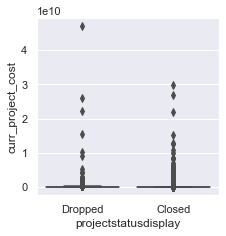

In [81]:
num_col_final=["curr_project_cost"]
plt.figure(figsize=(15,15))
for i in enumerate(num_col_final):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(x=df['projectstatusdisplay'],y=i[1],data=df.reset_index())

**there are outliers in dataset so filling missing values with mean is not feasible , i will use median to fill missing values**

In [82]:
np.mean(df)

index                1.263890e+04
curr_project_cost    1.209520e+08
dtype: float64

In [83]:
df.isnull().sum()

index                         0
regionname                    0
countryname                   0
projectstatusdisplay          0
last_stage_reached_name       0
project_name                  0
projectfinancialtype          0
curr_project_cost           116
lendinginstr                  0
envassesmentcategorycode      0
dtype: int64

In [84]:
for i in num_col_final:
    df[i].fillna(df[i].median(),inplace=True)

In [85]:
df.drop("index",inplace=True,axis=1)
df.head()

,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,projectfinancialtype,curr_project_cost,lendinginstr,envassesmentcategorycode
0,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,Other,3.400000e+05,Investment Project Financing,C
1,South Asia,Republic of India,Dropped,Concept Review,Strengthening Teaching-Learning and Results fo...,IDA,1.000000e+09,Program-for-Results Financing,B
2,Europe and Central Asia,Romania,Dropped,Concept Review,Emergency Response and Preparedness Program-fo...,Grants,1.448650e+09,Program-for-Results Financing,B
3,Europe and Central Asia,Ukraine,Dropped,Concept Review,Sustainable Energy Efficiency in Municipal Ser...,Other,3.416400e+08,Investment Project Financing,B
4,Latin America and Caribbean,United Mexican States,Dropped,Concept Review,Mexico: Sustainable Urban Development,Other,1.500000e+08,Investment Project Financing,B


In [86]:
df.isnull().sum()

regionname                  0
countryname                 0
projectstatusdisplay        0
last_stage_reached_name     0
project_name                0
projectfinancialtype        0
curr_project_cost           0
lendinginstr                0
envassesmentcategorycode    0
dtype: int64

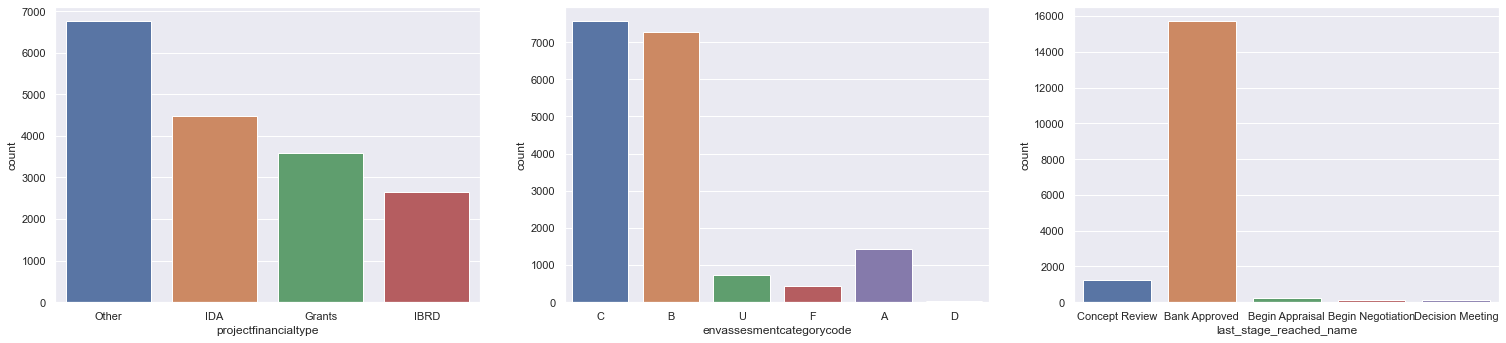

In [87]:
plt.figure(figsize=(35,25))
for i in enumerate(cols_largena):
    plt.subplot(4,4,i[0]+1)
    sns.countplot(df[i[1]])       # checking that ratio didnt change after filling missing values

In [88]:
df.drop(["project_name","countryname"],inplace=True,axis=1)
df.head()

,regionname,projectstatusdisplay,last_stage_reached_name,projectfinancialtype,curr_project_cost,lendinginstr,envassesmentcategorycode
0,Eastern and Southern Africa,Dropped,Concept Review,Other,3.400000e+05,Investment Project Financing,C
1,South Asia,Dropped,Concept Review,IDA,1.000000e+09,Program-for-Results Financing,B
2,Europe and Central Asia,Dropped,Concept Review,Grants,1.448650e+09,Program-for-Results Financing,B
3,Europe and Central Asia,Dropped,Concept Review,Other,3.416400e+08,Investment Project Financing,B
4,Latin America and Caribbean,Dropped,Concept Review,Other,1.500000e+08,Investment Project Financing,B


In [89]:
df.isnull().sum().sort_values(ascending=False)

regionname                  0
projectstatusdisplay        0
last_stage_reached_name     0
projectfinancialtype        0
curr_project_cost           0
lendinginstr                0
envassesmentcategorycode    0
dtype: int64

## Performing the Feature Encoding
Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called feature encoding.

In [90]:
df.dtypes

regionname                   object
projectstatusdisplay         object
last_stage_reached_name      object
projectfinancialtype         object
curr_project_cost           float64
lendinginstr                 object
envassesmentcategorycode     object
dtype: object

In [91]:
cat_col_final=["regionname","last_stage_reached_name","lendinginstr","projectfinancialtype","envassesmentcategorycode","projectstatusdisplay"]

In [92]:
for col in cat_col_final:
    print('{} has {} categories'.format(col,df[col].nunique()))

regionname has 9 categories
last_stage_reached_name has 5 categories
lendinginstr has 18 categories
projectfinancialtype has 4 categories
envassesmentcategorycode has 6 categories
projectstatusdisplay has 2 categories


## Label Encoding ---> Because there are less no. of categories in each column
LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. Fit label encoder.
A -- 0
B --1

In [93]:
 from sklearn.preprocessing import LabelEncoder

In [94]:
le=LabelEncoder()

In [95]:
for col in cat_col_final:
    df[col]=le.fit_transform(df[col])

In [96]:
df["projectstatusdisplay"]=le.fit_transform(df["projectstatusdisplay"])

In [97]:
df.head()

,regionname,projectstatusdisplay,last_stage_reached_name,projectfinancialtype,curr_project_cost,lendinginstr,envassesmentcategorycode
0,2,1,3,3,3.400000e+05,5,2
1,7,1,3,2,1.000000e+09,8,1
2,3,1,3,0,1.448650e+09,8,1
3,3,1,3,3,3.416400e+08,5,1
4,4,1,3,3,1.500000e+08,5,1


## Selecting important features

- **SelectKBest**: Feature selection is a technique where we choose those features in our data that contribute most to the target variable. In other words we choose the best predictors for the target variable. The classes in the sklearn.

- **chi2**: A chi-square (χ2) statistic is a test that measures how a model compares to actual observed data. ... The chi-square statistic compares the size any discrepancies between the expected results and the actual results, given the size of the sample and the number of variables in the relationship.

![image](https://media.geeksforgeeks.org/wp-content/uploads/20190318131202/chi2-form.jpg)

In [98]:
from sklearn.feature_selection import SelectKBest

In [99]:
from sklearn.feature_selection import chi2

In [100]:
ind_col=[col for col in df.columns if col!='projectstatusdisplay']
dep_col='projectstatusdisplay'

In [101]:
X=df[ind_col]
y=df[dep_col]

In [102]:
X.head()

,regionname,last_stage_reached_name,projectfinancialtype,curr_project_cost,lendinginstr,envassesmentcategorycode
0,2,3,3,3.400000e+05,5,2
1,7,3,2,1.000000e+09,8,1
2,3,3,0,1.448650e+09,8,1
3,3,3,3,3.416400e+08,5,1
4,4,3,3,1.500000e+08,5,1


In [103]:
imp_features=SelectKBest(score_func=chi2,k=4)

In [104]:
imp_features=imp_features.fit(X,y)

In [105]:
imp_features.scores_

array([1.06635399e+00, 1.89913366e+04, 1.35772912e+00, 1.16487707e+11,
       3.78156545e+01, 4.39414781e+01])

In [106]:
datascore=pd.DataFrame(imp_features.scores_,columns=['Score'])

In [107]:
datascore

,Score
0,1.066354e+00
1,1.899134e+04
2,1.357729e+00
3,1.164877e+11
4,3.781565e+01
5,4.394148e+01


In [108]:
X.columns

Index(['regionname', 'last_stage_reached_name', 'projectfinancialtype',
       'curr_project_cost', 'lendinginstr', 'envassesmentcategorycode'],
      dtype='object')

In [109]:
dfcols=pd.DataFrame(X.columns)

In [110]:
dfcols

,0
0,regionname
1,last_stage_reached_name
2,projectfinancialtype
3,curr_project_cost
4,lendinginstr
5,envassesmentcategorycode


In [111]:
features_rank=pd.concat([dfcols,datascore],axis=1)
features_rank

,0,Score
0,regionname,1.066354e+00
1,last_stage_reached_name,1.899134e+04
2,projectfinancialtype,1.357729e+00
3,curr_project_cost,1.164877e+11
4,lendinginstr,3.781565e+01
5,envassesmentcategorycode,4.394148e+01


In [112]:
features_rank.columns=['features','score']
features_rank

,features,score
0,regionname,1.066354e+00
1,last_stage_reached_name,1.899134e+04
2,projectfinancialtype,1.357729e+00
3,curr_project_cost,1.164877e+11
4,lendinginstr,3.781565e+01
5,envassesmentcategorycode,4.394148e+01


In [113]:
features_rank.nlargest(10,'score')

,features,score
3,curr_project_cost,1.164877e+11
1,last_stage_reached_name,1.899134e+04
5,envassesmentcategorycode,4.394148e+01
4,lendinginstr,3.781565e+01
2,projectfinancialtype,1.357729e+00
0,regionname,1.066354e+00


In [114]:
selected=features_rank.nlargest(4,'score')['features'].values

In [115]:
selected

array(['curr_project_cost', 'last_stage_reached_name',
       'envassesmentcategorycode', 'lendinginstr'], dtype=object)

In [116]:
X_new=df[selected]

In [117]:
X_new.head(396)

,curr_project_cost,last_stage_reached_name,envassesmentcategorycode,lendinginstr
0,3.400000e+05,3,2,5
1,1.000000e+09,3,1,8
2,1.448650e+09,3,1,8
3,3.416400e+08,3,1,5
4,1.500000e+08,3,1,5
5,2.000000e+08,0,2,2
6,9.500000e+07,1,2,5
7,1.500000e+07,2,1,5
8,4.100000e+05,3,5,5
9,3.720000e+06,0,2,5


In [118]:
y

0        1
1        1
2        1
3        1
4        1
5        0
6        1
7        1
8        1
9        0
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       0
18       0
19       1
20       0
21       1
22       1
23       0
24       0
25       0
26       0
27       0
28       0
29       1
30       0
31       1
32       0
33       0
34       0
35       0
36       0
37       1
38       0
39       0
40       0
41       1
42       0
43       1
44       1
45       0
46       0
47       1
48       0
49       1
50       1
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
59       0
60       0
61       1
62       0
63       0
64       0
65       0
66       0
67       1
68       1
69       0
70       0
71       1
72       0
73       0
74       1
75       0
76       0
77       0
78       0
79       1
80       1
81       0
82       0
83       0
84       0
85       0
86       0
87       0
88       1
89       1
90       0

In [119]:
X_new.shape,y.shape

((17508, 4), (17508,))

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,random_state=0,test_size=0.3)

In [122]:
X_train.shape,y_train.shape

((12255, 4), (12255,))

In [123]:
X_test.shape,y_test.shape

((5253, 4), (5253,))

In [124]:
y_train.value_counts()    #Checking for imbalancing

0    11058
1     1197
Name: projectstatusdisplay, dtype: int64

# XGBoost Classifier - For our Model

- XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.

![image](https://miro.medium.com/max/1400/1*FLshv-wVDfu-i54OqvZdHg.png)

In [125]:
from xgboost import XGBClassifier

In [126]:
params={'learning-rate':[0,0.5,0.20,0.25],
        'max_depth':[5,8,10],
       'min_child_weight':[1,3,5,7],
       'gamma':[0.0,0.1,0.2,0.4],
       'colsample_bytree':[0.3,0.4,0.7]}

**RandomizedSearchCV** :Randomized search on hyper parameters. RandomizedSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

![image](https://miro.medium.com/max/1000/1*9W1MrRkHi0YFmBoHi9Y2Ow.png)

In [127]:
from sklearn.model_selection import RandomizedSearchCV

In [128]:
classifier=XGBClassifier()

In [129]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [130]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[13:35:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learning-rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=

In [131]:
random_search.best_estimator_    #Checking for best model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning-rate=0.2, learning_rate=0.300000012, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=5, max_leaves=0,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [132]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 5,
 'learning-rate': 0.2,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [133]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='', learning_rate=0.300000012, max_delta_step=0,
              max_depth=5, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [134]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=8, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

# Let's Predict our model Accuracy.

In [135]:
y_pred=classifier.predict(X_test)

In [136]:
y_pred

array([0, 1, 0, ..., 0, 1, 0])

# Evaluation of the model

In [137]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics

In [138]:
confusion_matrix(y_test,y_pred)

array([[4643,   82],
       [ 187,  341]], dtype=int64)

In [144]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

4643 82 187 341


In [139]:
accuracy_score(y_test,y_pred)

0.9455549209975253

In [140]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.05444507900247478
MSE: 0.05444507900247478
RMSE: 0.23333469309657914


In [146]:
precision=tp/(tp+fp)
recall=tp/(tp+fn)
print("Precision : ",precision)
print("Recall : ",recall)
f1score=(2*precision*recall)/(precision+recall)
print("F1 score: ",f1score)

Precision :  0.806146572104019
Recall :  0.6458333333333334
F1 score:  0.7171398527865406


<div class="alert alert-success" markdown="1">

> As we Performed all the Methods and Trained our Model using different Methods

### As the dataset is **imbalanced** accuracy can not be taken  as a metric 
### F1 Score is our Model Metric

# We Got Very Good F1 Score Using XGBoost :  71.7%

### We could check if the performance increases if diffrent variables  were used

</div>

# Saving The Model

In [143]:
import pickle
#Open a file where you want to store the data
file=open('model_final.pkl','wb')

#dump information to that file
pickle.dump(classifier,file)

In [144]:
model=open('model_final.pkl','rb')
wbd=pickle.load(model)

In [145]:
y_pred1=wbd.predict(X_test)
metrics.r2_score(y_test,y_pred1)

0.39780423280423294